# CSE4502: Assignment 3

## NAME: Arianna Azizi


**Due**: Tuesday, April 30, 11:59 PM

**Total Points**: 100


**How to submit**: Create a zip folder named "Assignment3_your name". Include the `.ipynb` file with your answers PLUS its `.html` file as a backup. 

**Important**: The places that require your code answer are marked with `"# YOUR CODE"` comments. Do not remove `"# YOUR CODE"`marks.


Good Luck!

---



## 1) Dimensionality Reduction [20 pts]

The curse of dimensionality is an issue for many applications; increasing the number of features will not always improve classification accuracy. Dimensionality reduction techniques can help with the issue. The goal is to choose an optimum set of features of lower dimensionality to improve classification accuracy. These techniques fall into two major categories: 
<br> **Feature selection:** chooses a subset of the original features
<br> **Feature extraction:** finds a set of new features (i.e., through some mapping f()) from the existing features

<br> **Principle Component Analysis (PCA)** is a feature extraction technique that can be used for both compression (reduce the memory needed to store the data, speed up learning algorithm) and visualization. 


 **PCA in a pipeline**
Run the following codes. Does adding PCA to the pipeline reduce overfitting in this dataset? Explain. **Incorporating PCA into the pipeline has balanced the model’s ability to learn from the training data without overly fitting to noise and specific details, thus enhancing the model’s generalization to the test data. This result supports the use of PCA not only for feature reduction and faster computation but also as a technique to reduce overfitting in models dealing with high-dimensional data.**

notes: 
- a pipeline = an sequence of data processing steps that culminate in the application of a model
- machine learning pipeline = 1) data preprocessing, 2) feature selection or reduction (this is where you would use PCA), 3) modeling


In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

dataset = pd.read_csv('Wine.csv')
X = dataset.drop('Wine', axis =1)
y = dataset['Wine']
dataset.head()

print('Dimensions: %s x %s' % (X.shape[0], X.shape[1]))
print('\nHeader: %s' % ['alcohol', 'malic acid', 'ash', 'ash alcalinity',
                        'magnesium', 'total phenols', 'flavanoids',
                        'nonflavanoid phenols', 'proanthocyanins',
                        'color intensity', 'hue', 'OD280/OD315 of diluted wines',
                        'proline'])

print('\nClasses: %s' % np.unique(y))
print('Class distribution: %s' % np.bincount(y))

Dimensions: 178 x 13

Header: ['alcohol', 'malic acid', 'ash', 'ash alcalinity', 'magnesium', 'total phenols', 'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue', 'OD280/OD315 of diluted wines', 'proline']

Classes: [0 1 2]
Class distribution: [59 71 48]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3, stratify=y)

pipe = make_pipeline(StandardScaler(),
                     KNeighborsClassifier(n_neighbors=5))

pipe.fit(X_train, y_train)

print('Orig. training accuracy: %.2f%%' % (pipe.score(X_train, y_train)*100))
print('Orig. test accuracy: %.2f%%' % (pipe.score(X_test, y_test)*100))

Orig. training accuracy: 99.19%
Orig. test accuracy: 92.59%


In [17]:
pipe_pca = make_pipeline(StandardScaler(),
                         PCA(n_components=3),
                         KNeighborsClassifier(n_neighbors=5))

pipe_pca.fit(X_train, y_train)


print('Transf. training accuracy: %.2f%%' % (pipe_pca.score(X_train, y_train)*100))
print('Transf. test accuracy: %.2f%%' % (pipe_pca.score(X_test, y_test)*100))

Transf. training accuracy: 96.77%
Transf. test accuracy: 96.30%


## 2) Random Forests [30 pts]
One of the random forests output is **feature importance**. It gives you a notion of how much each feature contributes to the decision. You can use the feature importance information to (1) interpret your model and get more insight, or (2) you can use it as a feature selection method. How? Re-run your model with a subset of features that pass a certain threshold.

<br> 1) Run the code. Based on the plot, which feature is the most important one? **Proline**
<br> 2) Set the feature selection's threshold equal to '1.25\*median' in line 4 (a parameter of SelectFromModel). How many features will be selected? **6**
<br> 3) Does the performance improve using the reduced set of features? **Yes, performance improves as the training accuracy increased. But, the testing accuracy stayed the same**

In [20]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
#added the threshold to embeded_rf_selector
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=123), threshold="1.25*median") # YOUR CODE

embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support() # Get a mask, or integer index, of the features selected
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

6 selected features
['Alcohol', 'Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline']


In [21]:
X_transform = embeded_rf_selector.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, random_state=123, test_size=0.3, stratify=y)

pipe = make_pipeline(StandardScaler(),
                     KNeighborsClassifier(n_neighbors=5))

pipe.fit(X_train, y_train)

print('Orig. training accuracy: %.2f%%' % (pipe.score(X_train, y_train)*100))
print('Orig. test accuracy: %.2f%%' % (pipe.score(X_test, y_test)*100))

Orig. training accuracy: 99.19%
Orig. test accuracy: 98.15%


Alcohol                 0.109683
Malic.acid              0.032723
Ash                     0.012273
Acl                     0.029420
Mg                      0.028791
Phenols                 0.057904
Flavanoids              0.133867
Nonflavanoid.phenols    0.008221
Proanth                 0.027035
Color.int               0.158535
Hue                     0.076407
OD                      0.138427
Proline                 0.186715
dtype: float64


<Axes: >

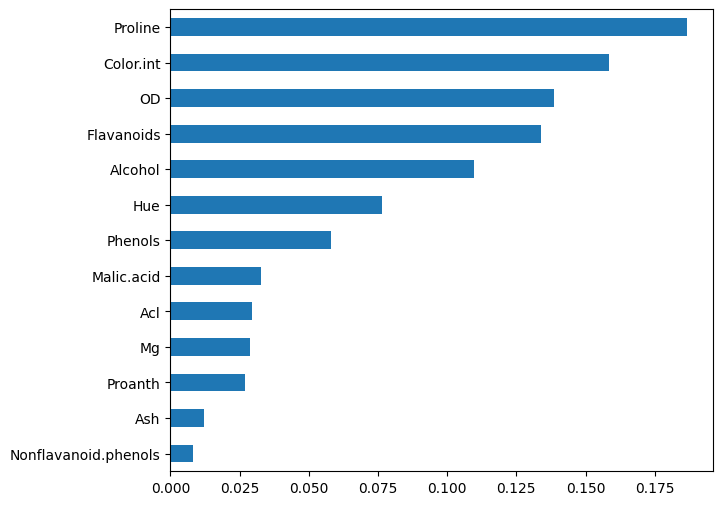

In [22]:
feature_importances = pd.Series(embeded_rf_selector.estimator_.feature_importances_, index=X.columns)
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(7,6))

## 3) Model Evaluation [50 pts]

Run the cells in this section and answer the following questions: **[Your Answers]**

---

1- How much will the CV accuracy change if you do not scale the data before modeling? 

**Without scaling the data, CV accuracy decreases from 0.961 to 0.919. This shows scaling improves model accuracy.**

2- What are the difference between the learning curve and the validation curve? 

**Validation curves show how model performance changes with different settings of a specific parameter. Learning curves show how model performance improves as more training data is used.**

3- Can we diagnose model overfitting/underfitting using the curves? How? 

**Yes, you can identify overfitting if the learning curve shows a big gap between training and validation performance, meaning the model does well on training data, but not on unseen data. Overfitting is also suggested by a peak and then a drop in the validation curve as complexity increases. Underfitting is shown by consistently low accuracy on both curves, suggesting the model is too simple.**

4- How do we treat the overfitting/underfitting? 

**Reduce overfitting by simplifying the model, and tackle underfitting by increasing model complexity or adding more training data. For instance, in k-nearest neighbors, decrease k to address overfitting and increase it to help with underfitting.**

5- Change the scoring metric in grid search from `accuracy` to `f1` and report the value. 

**0.9564099246736818**


In [24]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
# Transform the class lables from string format to integers 

from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values

le = LabelEncoder()
y = le.fit_transform(y)
print(le.classes_)
print(le.transform(['M', 'B']))

['B' 'M']
[1 0]


In [26]:
# Split the data into 80% training data and 20% test data, using a stratified split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [27]:
# Define a pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline


pipe_knn = make_pipeline(StandardScaler(),
                        KNeighborsClassifier(n_neighbors=10))

pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)
print('Test Accuracy: %.3f' % pipe_knn.score(X_test, y_test))

Test Accuracy: 0.956


In [28]:
# Using k-fold cross validation to assess model performance

import numpy as np
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_knn,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.91304348 0.97826087 0.95652174 0.95652174 0.93478261 0.91111111
 0.97777778 0.97777778 1.         1.        ]
CV accuracy: 0.961 +/- 0.031


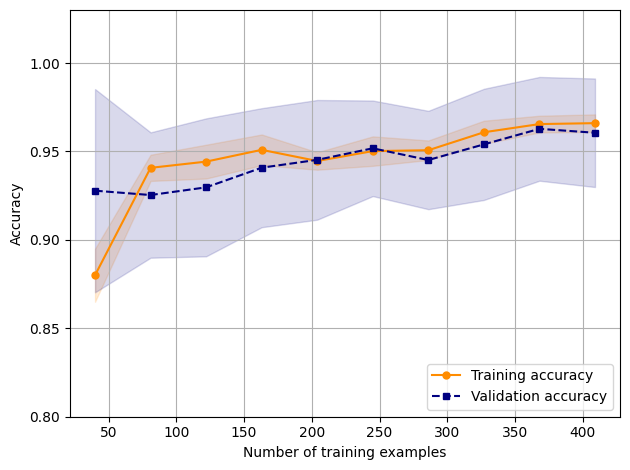

In [29]:
# Learning Curve
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_knn,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='darkorange', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='darkorange')

plt.plot(train_sizes, test_mean,
         color='navy', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='navy')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()

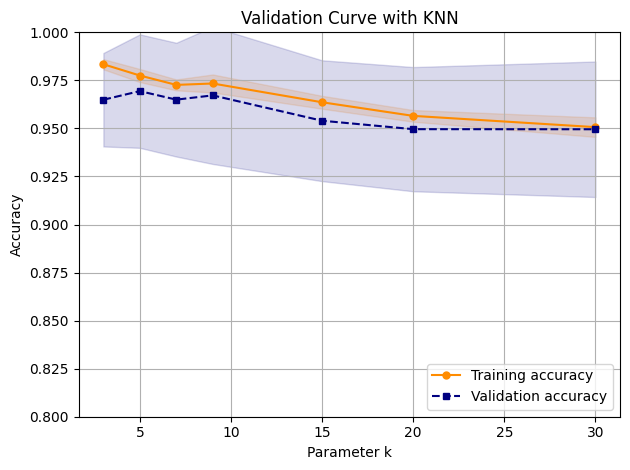

In [30]:
# Validation curve
from sklearn.model_selection import validation_curve


param_range = [3, 5, 7, 9, 15, 20, 30]
train_scores, test_scores = validation_curve(
                estimator=pipe_knn, 
                X=X_train, 
                y=y_train, 
                param_name='kneighborsclassifier__n_neighbors', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='darkorange', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='darkorange')

plt.plot(param_range, test_mean, 
         color='navy', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='navy')

plt.grid()
plt.title("Validation Curve with KNN")
plt.legend(loc='lower right')
plt.xlabel('Parameter k')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()






In [34]:
# Hyperparameter tuning via grid search

from sklearn.model_selection import GridSearchCV

param_range = [3, 5, 7, 9, 15, 20, 30]

pipe_knn = make_pipeline(StandardScaler(),
                         KNeighborsClassifier())

param_grid = [{'kneighborsclassifier__n_neighbors': param_range}]


gs = GridSearchCV(estimator=pipe_knn,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)


gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

clf = gs.best_estimator_

print('Test accuracy: %.3f' % clf.score(X_test, y_test))

0.9694202898550724
{'kneighborsclassifier__n_neighbors': 5}
Test accuracy: 0.965
